In [31]:
# import dependencies
import requests
# Data Cleaning
import pandas as pd 
import openpyxl
# SQL Datbase Adapter and ORM
%pip install psycopg2
from sqlalchemy import create_engine, text
# Visualizations
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit
from scipy import stats

Note: you may need to restart the kernel to use updated packages.


In [2]:
#format list for the dataframe
key = '6924a24c5e8fd68ab4c75b8911dde245'
state_ids = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL',
             'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
             'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE',
             'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
             'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
             'VA', 'WA', 'WI', 'WV', 'WY']

In [3]:
#create dataframe and read in the two json files holding personal expenditures and personal income per capita
for x in state_ids:
  RINCPC = f"https://api.stlouisfed.org/fred/series/observations?series_id={x}RPIPC&api_key={key}&file_type=json"
  response = requests.get(RINCPC)
  series = pd.DataFrame(response.json()["observations"])
  series["value"] = series.rename(columns={'value': x}, inplace=True)
  series = series[['date', x]]
  if x == state_ids[0]:
    df = series
  else:
    df = pd.merge(df, series, on='date', how='inner')
df = df.set_index('date').T
df = df.reset_index()
df['region/state of residence'] = df['index']
df = df.drop(columns='index')
states = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
          'FL': 'Florida','GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'kentucky',
          'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 
          'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska','NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 
          'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
          'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
          'VA': 'Virginia', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'}
df = df.rename(columns= {'2008-01-01': '2008', '2009-01-01': '2009',  '2010-01-01': '2010', '2011-01-01': '2011', '2012-01-01': '2012', '2013-01-01': '2013',
         '2014-01-01': '2014', '2015-01-01': '2015',  '2016-01-01': '2016', '2017-01-01': '2017', '2018-01-01': '2018', '2019-01-01': '2019',
         '2020-01-01': '2020', '2021-01-01': '2021', '2022-01-01': '2022'})         
df = df.replace(states)


In [10]:
#print dataframe to csv - real income - has income per capita income per state
df.to_csv('../Data/realincome.csv', encoding='utf-8', index=False)

In [11]:
income_csv = pd.read_csv('../Data/realincome.csv')
income_csv.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,region/state of residence
0,42242,41995,41757,41849,41617,41356,42010,43835,43577,44472,46441,47123,50207,52290,50053,Alabama
1,51624,50046,53121,54738,55069,53511,55466,56504,54409,54005,55410,56881,58532,57623,58069,Alaska
2,38967,36641,37162,38384,39253,39171,40235,41903,42530,44250,45656,47219,50355,53694,50480,Arizona
3,40983,40970,40280,41286,43016,42407,44095,45429,45891,46835,48479,48268,51209,53390,52430,Arkansas
4,43801,42404,43519,44858,46170,45839,47491,50074,51845,52604,53481,55915,60011,63271,59103,California


In [12]:
cms_wb = openpyxl.load_workbook('../Data/Residence_all_tables.xlsx')
Ws = cms_wb.sheetnames

In [13]:
print(Ws)

['Contents', 'Table 1 Personal Health Care', 'Table 2 Hospital', 'Table 3 Physician and Clinics', 'Table 4 Other Professionals', 'Table 5 Dental', 'Table 6 Home Health', 'Table 7 Nursing', 'Table 8 Drugs and Non-durables', 'Table 9 Durables', 'Table 10 Other Health', 'Table 11 Personal Health Care', 'Table 12 Hospital', 'Table 13 Physician and Clinics', 'Table 14 Other Professionals', 'Table 15 Dental', 'Table 16 Home Health', 'Table 17 Nursing', 'Table 18 Drugs and Non-durables', 'Table 19 Durables', 'Table 20 Other Health', 'Table 21 Population', 'Table 22 Medicare', 'Table 23 Medicare Per Enrollee', 'Table 24 Medicare Enrollment', 'Table 25 Medicaid', 'Table 26 Medicaid Per Enrollee', 'Table 27 Medicaid Enrollment', 'Table 28 Private Health', 'Table 29 Private Per Enrollee', 'Table 30 Private Enrollment']


In [78]:

df2 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 11 Personal Health Care')
df3 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 12 Hospital')
df4 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 13 Physician and Clinics')
df5 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 16 Home Health')
df6 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 17 Nursing')
df7 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 23 Medicare Per Enrollee')
df8 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 26 Medicaid Per Enrollee')
df9 = pd.read_excel('..\Data\Residence_all_tables.xlsx', 'Table 29 Private Per Enrollee')

name2 = 'Personal Health Care'
name3 = 'Hospital'
name4 = 'Physician and Clinics'
name5 = 'Home Health'
name6 = 'Nursing'
name7 = 'Medicare Per Enrollee'
name8 = 'Medicaid Per Enrollee'
name9 = 'Private Per Enrollee'

def clean(data):
    dat = data
    dat.columns = (dat.iloc[0])
    dat = dat.drop(62)
    dat = dat.drop(61)
    dat = dat.drop(0)
    dat = dat.rename(columns= {2008.0: 2008, 2009.0: 2009, 2010.0: 2010, 2011.0: 2011, 2012.0: 2012, 2013.0: 2013, 2014.0: 2014,
                           2015.0: 2015, 2016.0: 2016, 2017.0: 2017, 2018.0: 2018, 2019.0: 2019, 2020.0: 2020})
    dat = dat[['Region/state of residence', 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]]
    dat = dat.astype({2008: int, 2009: int, 2010: int, 2011: int, 2012: int, 2013: int, 2014: int,
                           2015: int, 2016: int, 2017: int, 2018: int, 2019: int, 2020: int})
    dat = dat.rename(columns={'Region/state of residence': 'region/state of residence'})
    if data.equals(df2):
        dat.to_csv(f'..\Data\{name2}.csv', encoding='utf-8', index=False)
    elif data.equals(df3):
        dat.to_csv(f'..\Data\{name3}.csv', encoding='utf-8', index=False)
    elif data.equals(df4):
        dat.to_csv(f'..\Data\{name4}.csv', encoding='utf-8', index=False)
    elif data.equals(df5):
        dat.to_csv(f'..\Data\{name5}.csv', encoding='utf-8', index=False)
    elif data.equals(df6):
        dat.to_csv(f'..\Data\{name6}.csv', encoding='utf-8', index=False)
    elif data.equals(df7):
        dat.to_csv(f'..\Data\{name7}.csv', encoding='utf-8', index=False)
    elif data.equals(df8):
        dat.to_csv(f'..\Data\{name8}.csv', encoding='utf-8', index=False)
    elif data.equals(df9):
        dat.to_csv(f'..\Data\{name9}.csv', encoding='utf-8', index=False)
    return dat

clean(df2), clean(df3), clean(df4), clean(df5), clean(df6), clean(df7), clean(df8), clean(df9);

      2008     2009     2010     2011     2012     2013     2014     2015  \
0  42242.0  41995.0  41757.0  41849.0  41617.0  41356.0  42010.0  43835.0   
1  51624.0  50046.0  53121.0  54738.0  55069.0  53511.0  55466.0  56504.0   
2  38967.0  36641.0  37162.0  38384.0  39253.0  39171.0  40235.0  41903.0   
3  40983.0  40970.0  40280.0  41286.0  43016.0  42407.0  44095.0  45429.0   
4  43801.0  42404.0  43519.0  44858.0  46170.0  45839.0  47491.0  50074.0   

      2016     2017     2018     2019     2020     2021     2022  \
0  43577.0  44472.0  46441.0  47123.0  50207.0  52290.0  50053.0   
1  54409.0  54005.0  55410.0  56881.0  58532.0  57623.0  58069.0   
2  42530.0  44250.0  45656.0  47219.0  50355.0  53694.0  50480.0   
3  45891.0  46835.0  48479.0  48268.0  51209.0  53390.0  52430.0   
4  51845.0  52604.0  53481.0  55915.0  60011.0  63271.0  59103.0   

  region/state of residence  
0                   Alabama  
1                    Alaska  
2                   Arizona  
3       

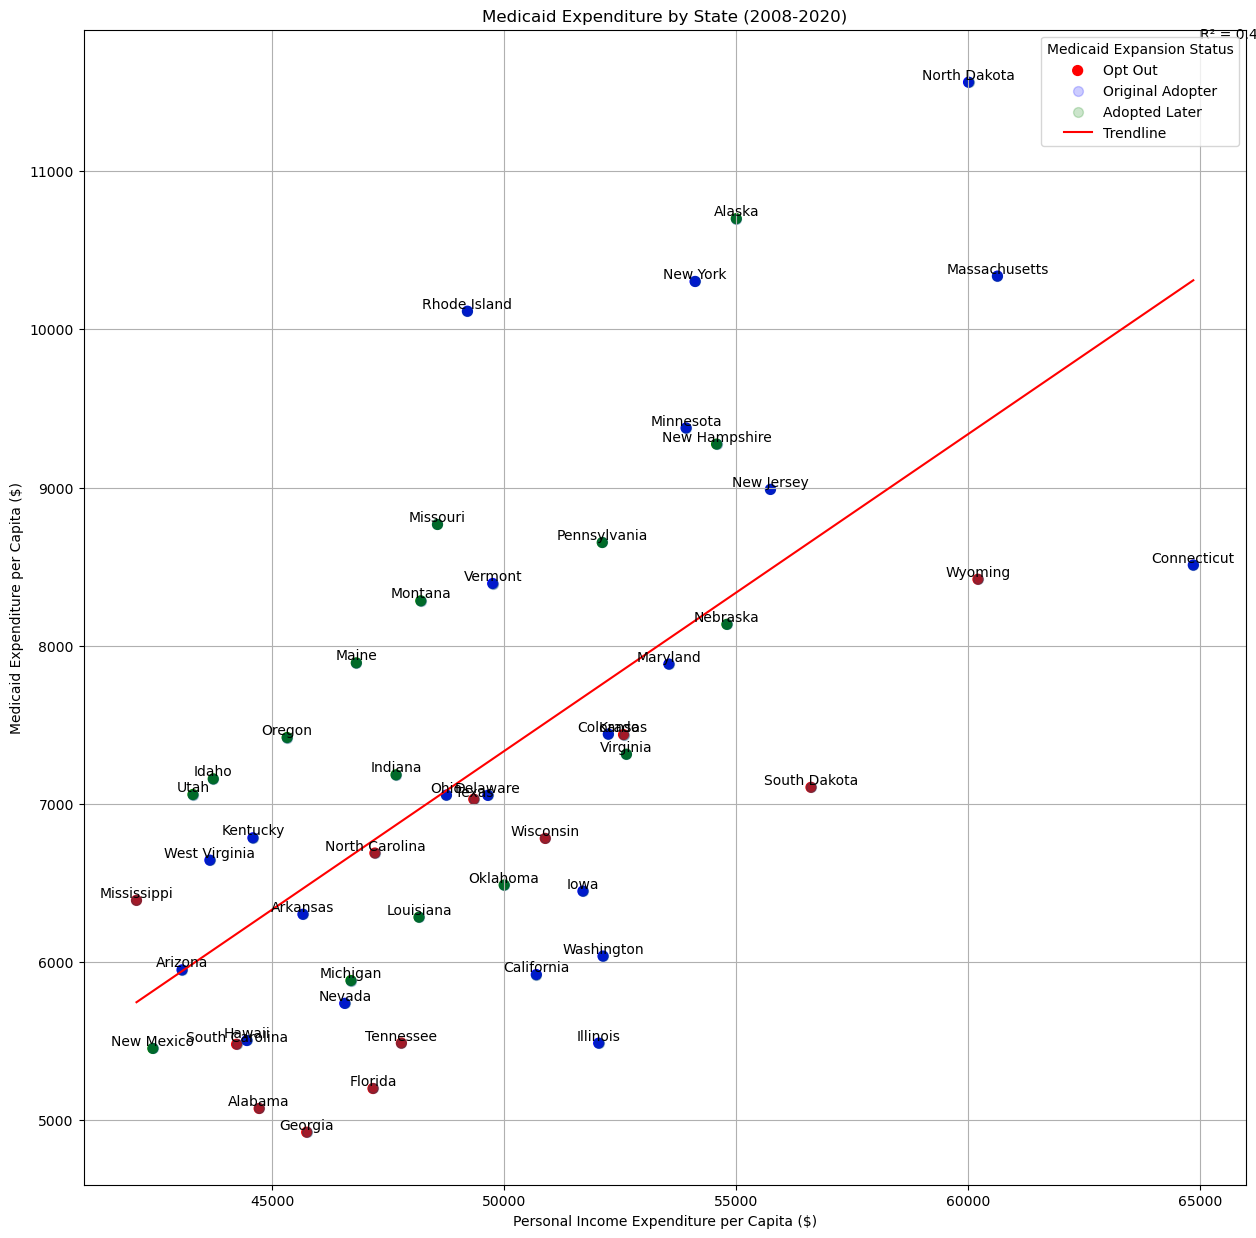

In [81]:
user = 'postgres' # Your username (try entering pgadmin to find)
password = 'Enter123' # Your Password
host = 'localhost'
port = '5432'
database_name = 'Healthcare_DB'

connection = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database_name}'
engine = create_engine(connection)
with engine.connect() as connection:
    query = text("SELECT * FROM income_per_capita;")
    query2 = text("SELECT * FROM medicaid;")
    df2 = pd.read_sql(query2, connection)
    df = pd.read_sql(query, connection)
    print(df.head())

connection.close()

df2_mean = df2.drop(columns={'region/state of residence'})
df2['medicaid'] = df2_mean.mean(axis=1)
df2.index = df2['region/state of residence']
df2 = df2.sort_index()
df2 = df2['medicaid']

df_mean = df.drop(columns={'region/state of residence'})
df['income_per_capita'] = df_mean.mean(axis=1)
df.index = df['region/state of residence']
df = df[['income_per_capita', '2020']]
df = df.merge(df2, on='region/state of residence')
df = df.reset_index('region/state of residence')

opt_out = ['Wyoming', 'Texas', 'South Dakota', 'Wisconsin', 'Mississippi', 'Tennessee', 'Alabama', 'Georgia', 'North Carolina',
        'South Carolina', 'Kansas', 'Florida']
upon_adoption = ['Arizona',	'Arkansas',	'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Iowa',
                 'Kentucky', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada', 'New Jersey', 'New York', 'North Dakota',
                 'Ohio', 'Rhode Island', 'Vermont', 'Washington', 'West Virginia']

colors_dict = {'Yes': 'red', 'No': 'blue', 'Adopters': 'green'}

plt.figure(figsize=(15, 15))
colors = [None] * len(df)
for i, row in df.iterrows():
    state = row['region/state of residence']
    if state in opt_out:
        colors[i] = 'red'
        label = 'Opt Out'
    elif state in upon_adoption:
        colors[i] = 'blue'
        label2 = 'Original Adopter'
    else:
        colors[i] = 'green'
        label3 = 'Adopted Later'

plt.scatter(df['income_per_capita'], df['medicaid'], s=50, c=colors, alpha=1.0, label=label)
plt.scatter(df['income_per_capita'], df['medicaid'], s=50, c='blue', alpha=0.2, label=label2)
plt.scatter(df['income_per_capita'], df['medicaid'], s=50, c='green', alpha=0.2, label=label3)
m, b = polyfit(df['income_per_capita'], df['medicaid'], 1)
r, p = stats.pearsonr(df['income_per_capita'], df['medicaid'])
r_squared = r**2
x_trend = np.linspace(min(df['income_per_capita']), max(df['income_per_capita']), 100)
y_trend = m * x_trend + b
plt.plot(x_trend, y_trend, color='red', label='Trendline')
plt.annotate(f"R² = {r_squared:.2f}", xy=(0.8, 0.8), xycoords='figure fraction')


for i, (inc, home_health, region) in enumerate(zip(df['income_per_capita'], df['medicaid'], df['region/state of residence'])):
    plt.text(inc, home_health + 0.1, region, ha='center', va='bottom', fontsize=10)

plt.xlabel('Personal Income Expenditure per Capita ($)')
plt.ylabel('Medicaid Expenditure per Capita ($)')
plt.title('Medicaid Expenditure by State (2008-2020)')
plt.legend(title='Medicaid Expansion Status')
plt.grid(True)
plt.show()

In [39]:
user = 'postgres'
password = 'Enter123' 
host = 'localhost'
port = '5432'
database_name = 'Healthcare_DB'

connection = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database_name}'
engine = create_engine(connection)
with engine.connect() as connection:
    query = text("SELECT * FROM personal_health_care_regions;")
    query2 = text("SELECT * FROM regional_averages_income;")
    df_average_income = pd.read_sql(query2, connection)
    df_healthcare_expen = pd.read_sql(query, connection)

with engine.connect() as connection:
    df_average_income = pd.read_sql(query2, connection)
    df_healthcare_expen = pd.read_sql(query, connection)
    
connection.close()

df_healthcare_expen.rename(columns={'region/state of residence': 'Region'}, inplace=True)
df_average_income.rename(columns={'region': 'Region'}, inplace=True)

df_healthcare_expen

,Region,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,New England,8445,8869,9043,9226,9484,9660,9990,10516,10940,11221,11643,12123,12728
1,Mideast,7699,8051,8313,8550,8735,8967,9375,9840,10338,10797,11273,11836,12577
2,Great Lakes,6688,6997,7216,7393,7672,7806,8143,8481,8797,9050,9291,9754,10221
3,Plains,6849,7077,7291,7537,7794,7907,8192,8547,8852,9066,9381,9765,10285
4,Southeast,6299,6549,6670,6813,7066,7162,7506,7870,8144,8425,8655,9019,9480
5,Southwest,5808,6027,6169,6309,6513,6562,6871,7238,7446,7664,7838,8153,8587
6,Rocky Mountains,5605,5767,5883,6032,6229,6355,6645,6988,7237,7524,7866,8139,8497
7,Far West,6124,6318,6552,6784,7066,7245,7516,8005,8312,8566,8992,9501,10076


In [40]:
income_cost_percentage = pd.DataFrame()

for year in range(2008, 2021):
    income_cost_percentage[f'{year}'] = (df_healthcare_expen[f'{year}'] / df_average_income[f'{year}']) * 100

income_cost_percentage.insert(0, 'Region', df_healthcare_expen['Region'])

income_cost_percentage.sort_values(by='Region', inplace=True)

income_cost_percentage

,Region,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
7,Far West,14.096308,15.384990,15.776547,15.851949,16.178592,16.609734,16.647839,17.636432,18.611733,18.661496,18.775970,19.316865,19.546072
2,Great Lakes,13.622291,14.675840,14.847431,14.898934,15.284086,15.733779,16.107847,16.176162,16.513365,16.678646,16.817203,17.280232,17.323142
1,Mideast,17.138214,18.657737,19.061268,18.905055,18.978816,19.542760,19.953601,19.924675,20.770297,21.323617,21.977658,22.689543,22.547912
0,New England,18.717585,20.659213,20.456499,20.561164,20.710137,21.412422,21.329746,21.572167,22.084502,22.473463,22.770476,23.034391,22.906918
3,Plains,13.858481,14.454952,14.369051,14.615086,15.034722,15.593508,15.608566,15.960486,16.417218,16.601051,16.680299,16.762510,16.975589
6,Rocky Mountains,13.252471,13.767337,14.178295,14.339371,14.638216,15.130232,15.419780,15.675542,16.174597,16.375033,16.566627,16.702237,16.438065
4,Southeast,12.399362,13.522889,13.681209,13.192495,13.425293,13.815320,14.213217,14.572185,15.204242,15.493113,15.911389,16.357734,16.133973
5,Southwest,12.492741,13.789869,13.735138,13.743002,13.651226,13.850603,14.024452,14.475710,15.103142,15.113390,14.511321,14.787340,14.528382


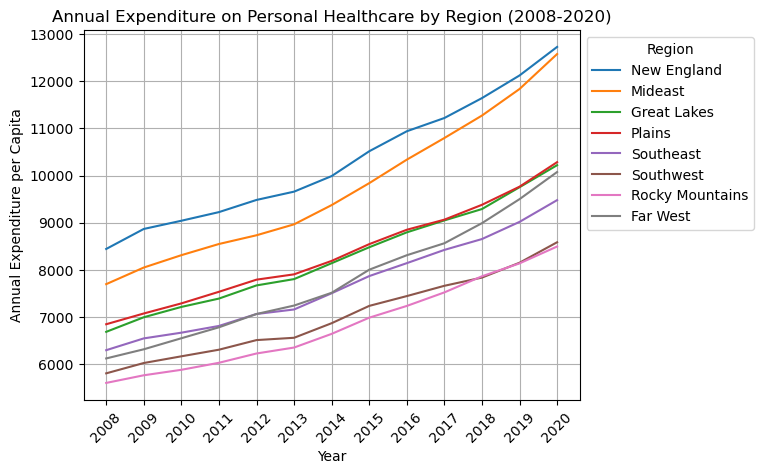

In [41]:
for region in df_healthcare_expen['Region']:
    plt.plot(df_healthcare_expen.columns[1:], df_healthcare_expen[df_healthcare_expen['Region'] == region].iloc[:, 1:].values.flatten(), label=region)

plt.title('Annual Expenditure on Personal Healthcare by Region (2008-2020)')
plt.xlabel('Year')
plt.ylabel('Annual Expenditure per Capita')
plt.xticks(df_healthcare_expen.columns[1:], rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

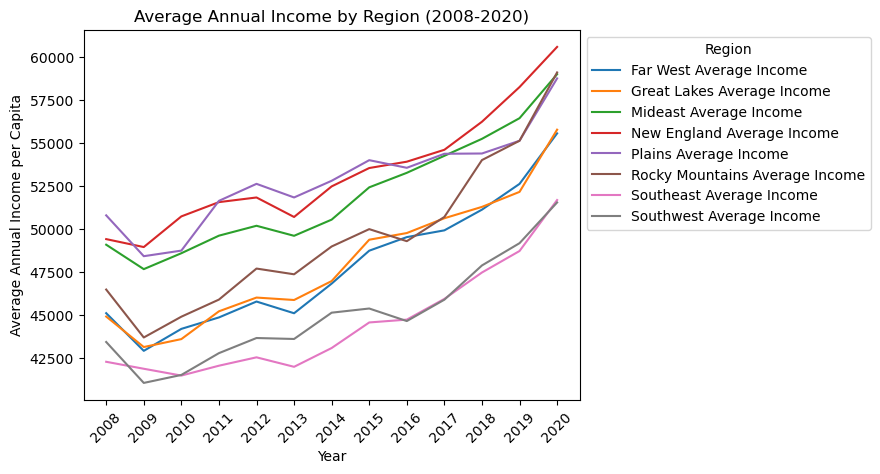

In [42]:
for region in df_average_income['Region']:
    plt.plot(df_average_income.columns[1:], df_average_income[df_average_income['Region'] == region].iloc[:, 1:].values.flatten(), label=region)

plt.title('Average Annual Income by Region (2008-2020)')
plt.xlabel('Year')
plt.ylabel('Average Annual Income per Capita')
plt.xticks(df_average_income.columns[1:], rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

C:\Users\3aama\AppData\Local\Temp\ipykernel_18216\267713371.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(income_cost_percentage.columns[1:], region[1][1:], label=region[1][0])


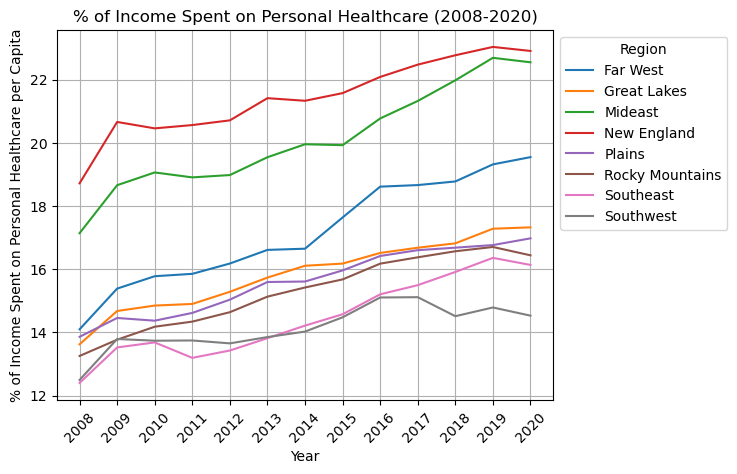

In [43]:
for region in income_cost_percentage.iterrows():
    plt.plot(income_cost_percentage.columns[1:], region[1][1:], label=region[1][0])

plt.title('% of Income Spent on Personal Healthcare (2008-2020)')
plt.xlabel('Year')
plt.ylabel('% of Income Spent on Personal Healthcare per Capita')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

In [44]:
#establish a connection
user = 'postgres'
password = 'Enter123' 
host = 'localhost'
port = '5432'
database_name = 'Healthcare_DB'

connection = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database_name}'
engine = create_engine(connection)
with engine.connect() as connection:
    comparisons_df = pd.read_sql_table(
    "Comparisons",
    con=engine,
    columns=['region/state of residence', '2010', '2010-2', '2010-3', '2015', '2015-2', '2015-3', '2020', '2020-2', '2020-3'],)
connection.close()

In [45]:
#print the postgresql table loaded as pandas dataframe
comparisons_df.head()

,region/state of residence,2010,2010-2,2010-3,2015,2015-2,2015-3,2020,2020-2,2020-3
0,Connecticut,11080,4522,9156,12113,4930,8089,12905,5692,7386
1,Maine,8622,4134,6098,9493,4590,7894,10343,5911,8974
2,Massachusetts,11384,4692,11941,12199,5233,9519,12917,5795,10844
3,New Hampshire,8698,4419,9549,9561,4552,8202,10086,4806,10142
4,Rhode Island,10320,4670,10660,10894,4393,9886,11231,4213,9468


In [46]:
print(comparisons_df.columns)

Index(['region/state of residence', '2010', '2010-2', '2010-3', '2015',
       '2015-2', '2015-3', '2020', '2020-2', '2020-3'],
      dtype='object')


In [47]:
columnNamechg=comparisons_df.rename(columns={comparisons_df.columns[1]:'Medicare_2010',
                                             comparisons_df.columns[2]:'PrivateIns_2010',
                                             comparisons_df.columns[3]:'Medicaid_2010',
                                             comparisons_df.columns[4]:'Medicare_2015',
                                             comparisons_df.columns[5]:'PrivateIns_2015',
                                             comparisons_df.columns[6]:'Medicaid_2015',
                                             comparisons_df.columns[7]:'Medicare_2020',
                                             comparisons_df.columns[8]:'PrivateIns_2020',
                                             comparisons_df.columns[9]:'Medicaid_2020'})

columnNamechg.head(10)

,region/state of residence,Medicare_2010,PrivateIns_2010,Medicaid_2010,Medicare_2015,PrivateIns_2015,Medicaid_2015,Medicare_2020,PrivateIns_2020,Medicaid_2020
0,Connecticut,11080,4522,9156,12113,4930,8089,12905,5692,7386
1,Maine,8622,4134,6098,9493,4590,7894,10343,5911,8974
2,Massachusetts,11384,4692,11941,12199,5233,9519,12917,5795,10844
3,New Hampshire,8698,4419,9549,9561,4552,8202,10086,4806,10142
4,Rhode Island,10320,4670,10660,10894,4393,9886,11231,4213,9468
5,Vermont,8750,4061,7532,9497,5301,8476,8726,5561,9405
6,Delaware,10589,4311,6291,11632,4446,6709,12101,5636,7973
7,District of Columbia,11312,7815,10165,12266,8445,9132,13350,9385,10588
8,Maryland,11407,3836,8198,12319,4140,7430,12805,5045,7838
9,New Jersey,12028,3877,10304,12756,4769,7449,13084,5514,8828


In [48]:
print(columnNamechg.columns)

Index(['region/state of residence', 'Medicare_2010', 'PrivateIns_2010',
       'Medicaid_2010', 'Medicare_2015', 'PrivateIns_2015', 'Medicaid_2015',
       'Medicare_2020', 'PrivateIns_2020', 'Medicaid_2020'],
      dtype='object')


In [49]:
columnNamechg.set_index(columnNamechg.columns[0])

,Medicare_2010,PrivateIns_2010,Medicaid_2010,Medicare_2015,PrivateIns_2015,Medicaid_2015,Medicare_2020,PrivateIns_2020,Medicaid_2020
region/state of residence,,,,,,,,,
Connecticut,11080,4522,9156,12113,4930,8089,12905,5692,7386
Maine,8622,4134,6098,9493,4590,7894,10343,5911,8974
Massachusetts,11384,4692,11941,12199,5233,9519,12917,5795,10844
New Hampshire,8698,4419,9549,9561,4552,8202,10086,4806,10142
Rhode Island,10320,4670,10660,10894,4393,9886,11231,4213,9468
Vermont,8750,4061,7532,9497,5301,8476,8726,5561,9405
Delaware,10589,4311,6291,11632,4446,6709,12101,5636,7973
District of Columbia,11312,7815,10165,12266,8445,9132,13350,9385,10588
Maryland,11407,3836,8198,12319,4140,7430,12805,5045,7838


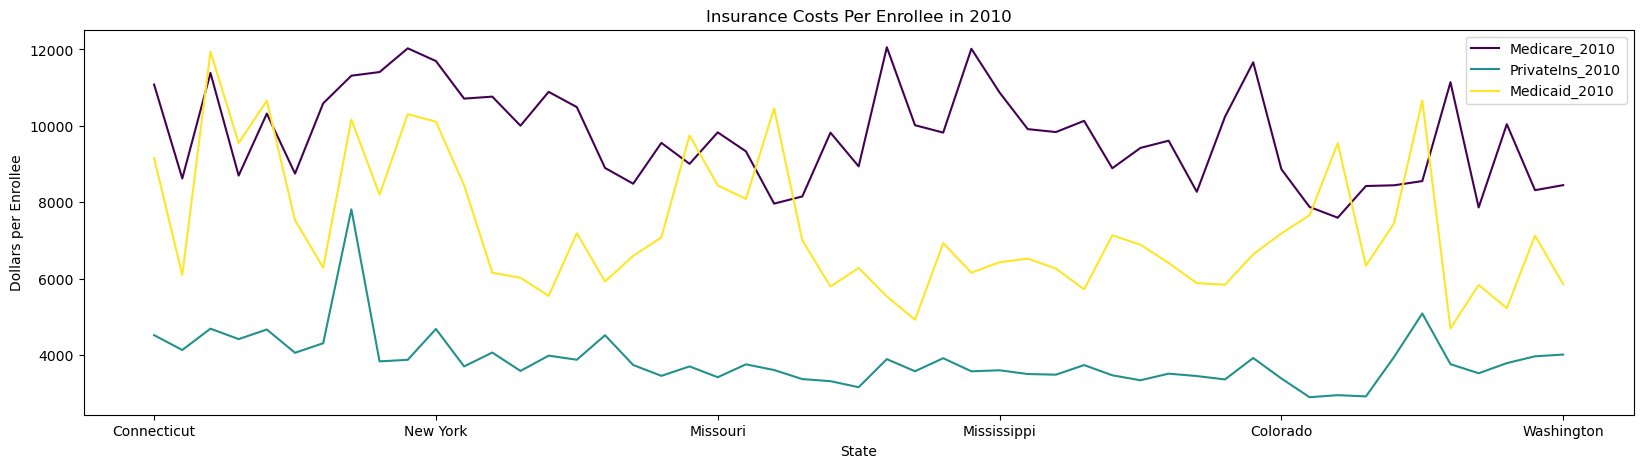

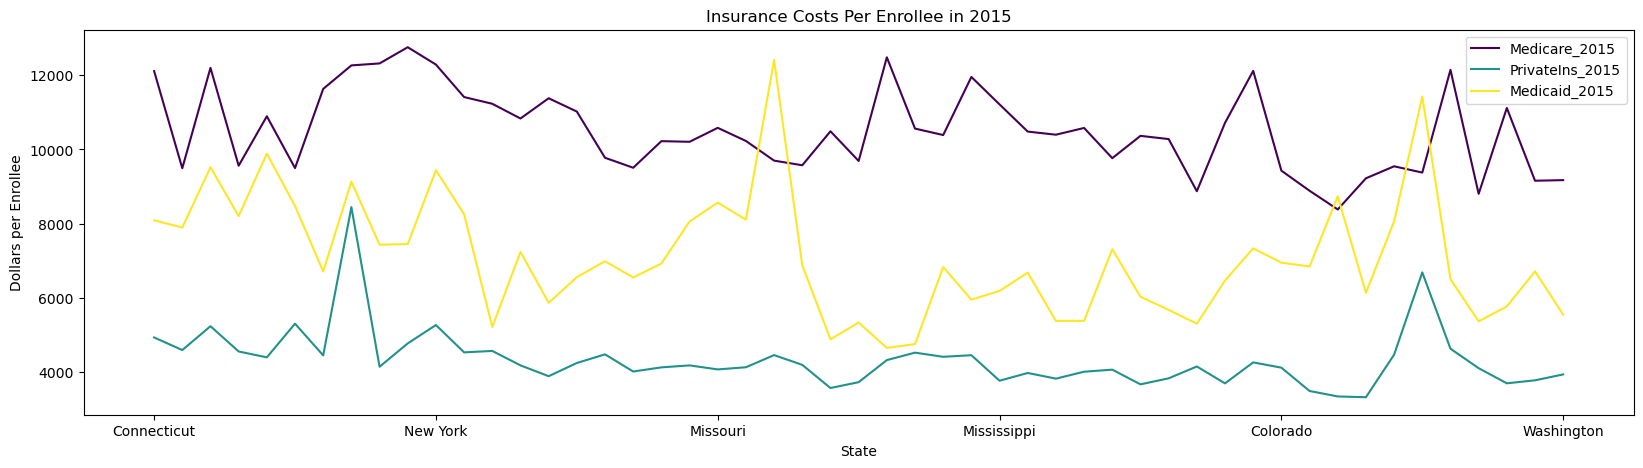

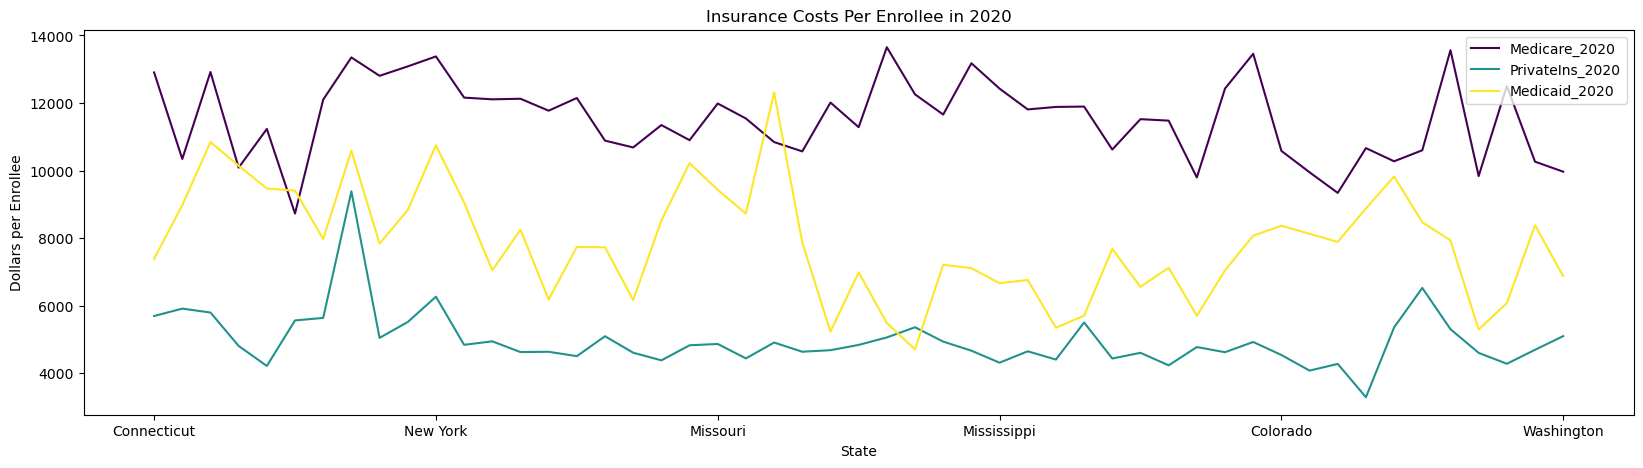

In [50]:
columnNamechg.plot(x='region/state of residence', y=["Medicare_2010", "PrivateIns_2010", "Medicaid_2010"],
                xlabel='State',
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2010",
                figsize=(20,5), colormap="viridis")
                  
columnNamechg.plot(x="region/state of residence", y=["Medicare_2015", "PrivateIns_2015", "Medicaid_2015"],
                xlabel="State",
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2015",
                figsize=(20,5), colormap="viridis")

columnNamechg.plot(x="region/state of residence", y=["Medicare_2020", "PrivateIns_2020", "Medicaid_2020"],
                xlabel="State",
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2020",
                figsize=(20,5), colormap="viridis")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

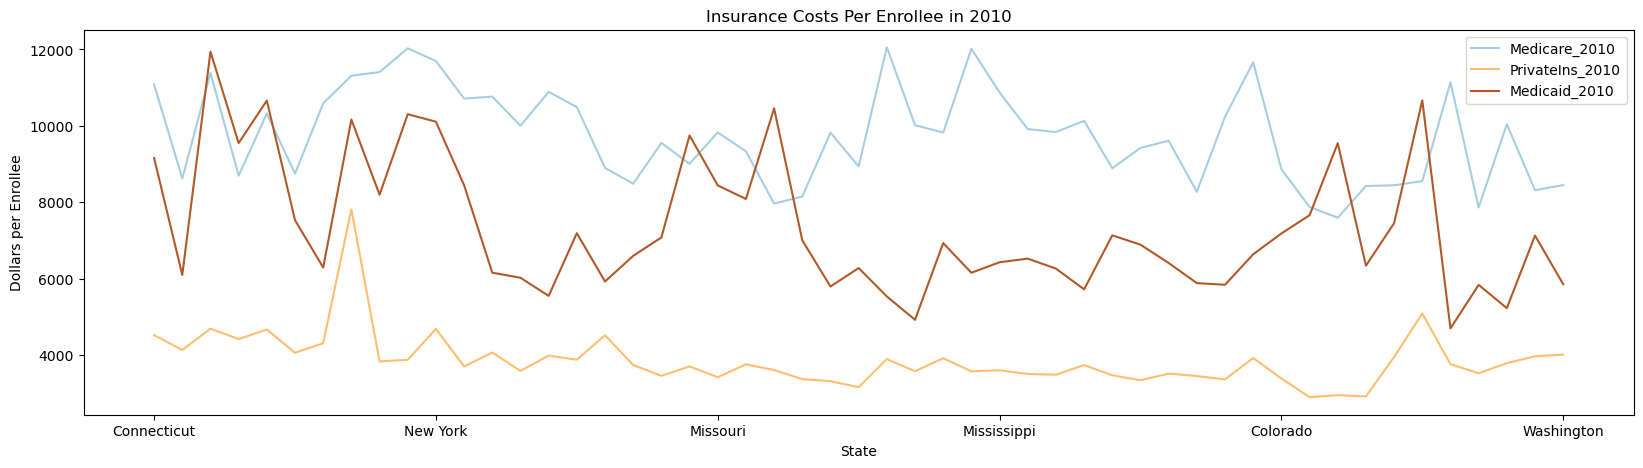

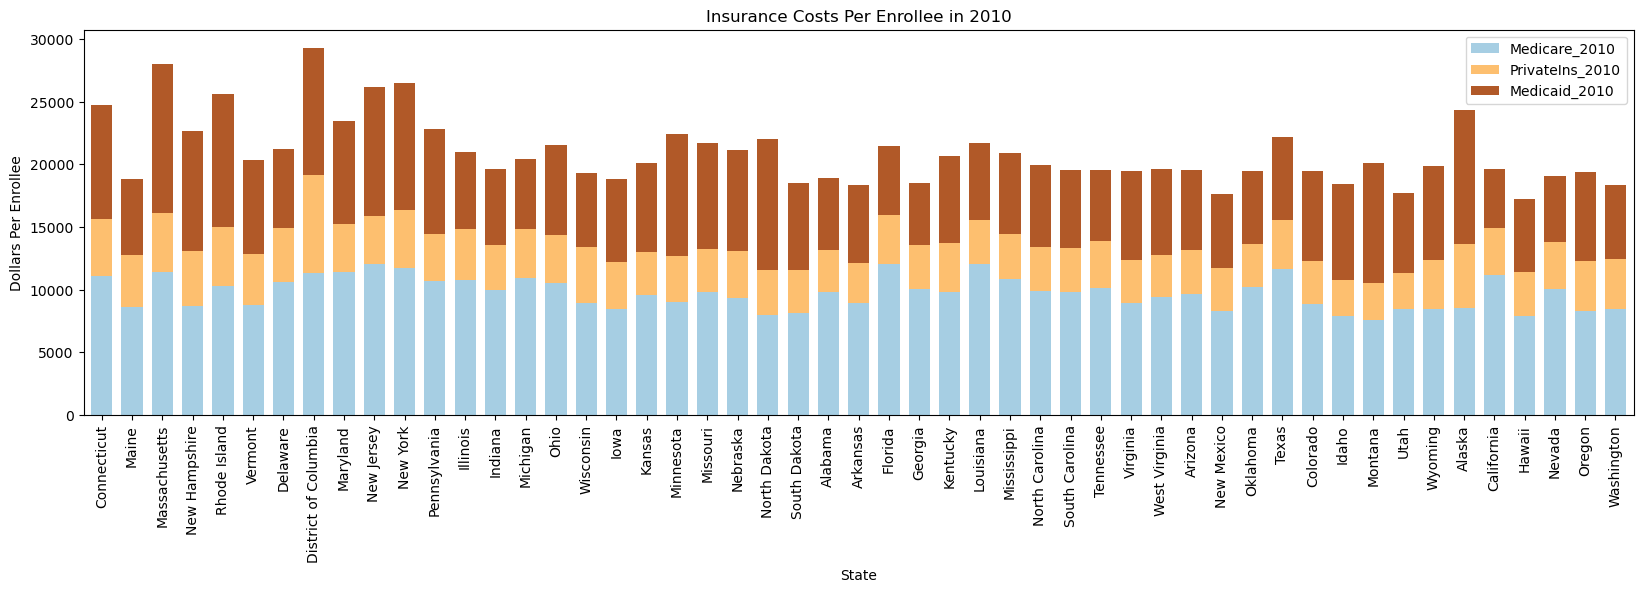

In [51]:
columnNamechg.plot(x='region/state of residence', y=["Medicare_2010", "PrivateIns_2010", "Medicaid_2010"],
                xlabel='State',
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2010",
                figsize=(20,5), colormap="Paired")

columnNamechg.plot(x="region/state of residence", y=["Medicare_2010", "PrivateIns_2010", "Medicaid_2010"],
                xlabel="State",
                ylabel="Dollars Per Enrollee", kind="bar", stacked=True, 
                title="Insurance Costs Per Enrollee in 2010",
                width = .7, figsize=(20,5),colormap='Paired')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

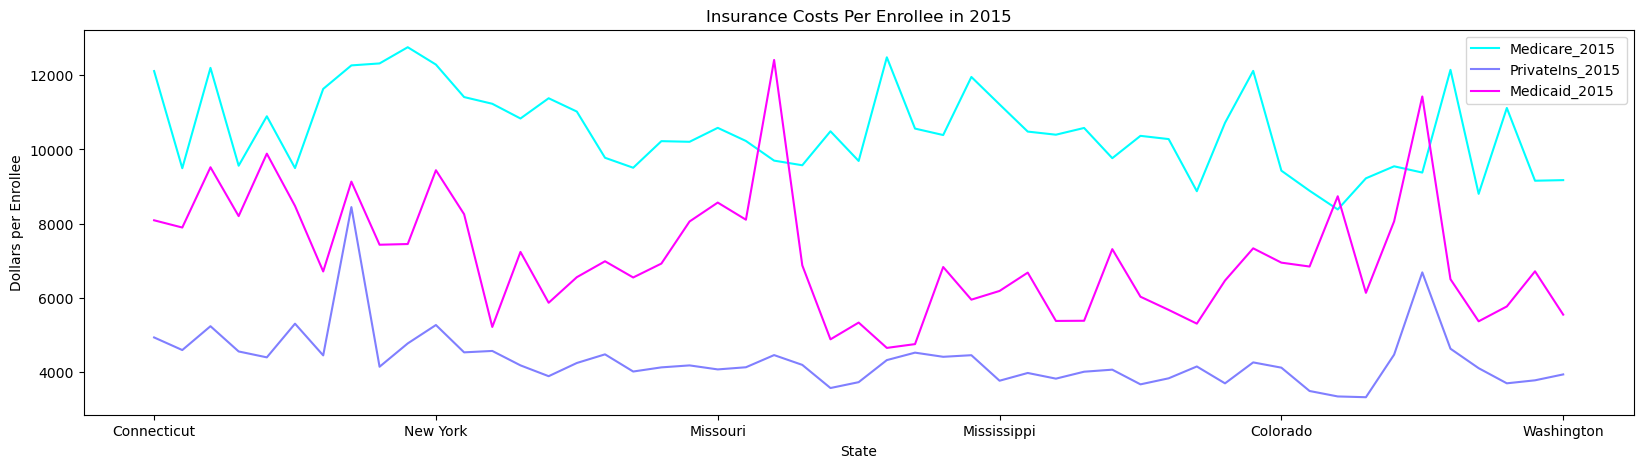

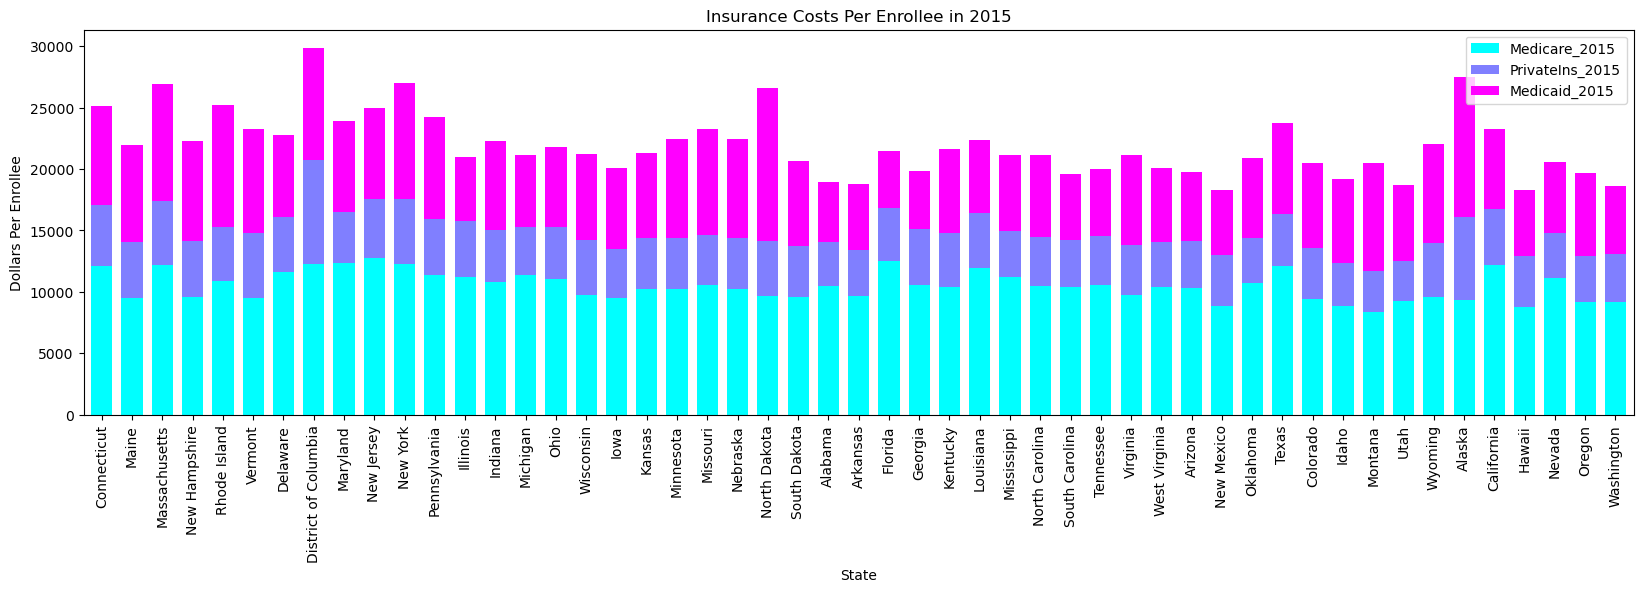

In [52]:
columnNamechg.plot(x="region/state of residence", y=["Medicare_2015", "PrivateIns_2015", "Medicaid_2015"],
                xlabel="State",
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2015",
                figsize=(20,5), colormap="cool")

columnNamechg.plot(x="region/state of residence", y=["Medicare_2015", "PrivateIns_2015", "Medicaid_2015"],
                xlabel="State",
                ylabel="Dollars Per Enrollee", kind="bar", stacked=True, 
                title="Insurance Costs Per Enrollee in 2015",
                width = .7, figsize=(20,5),colormap='cool')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

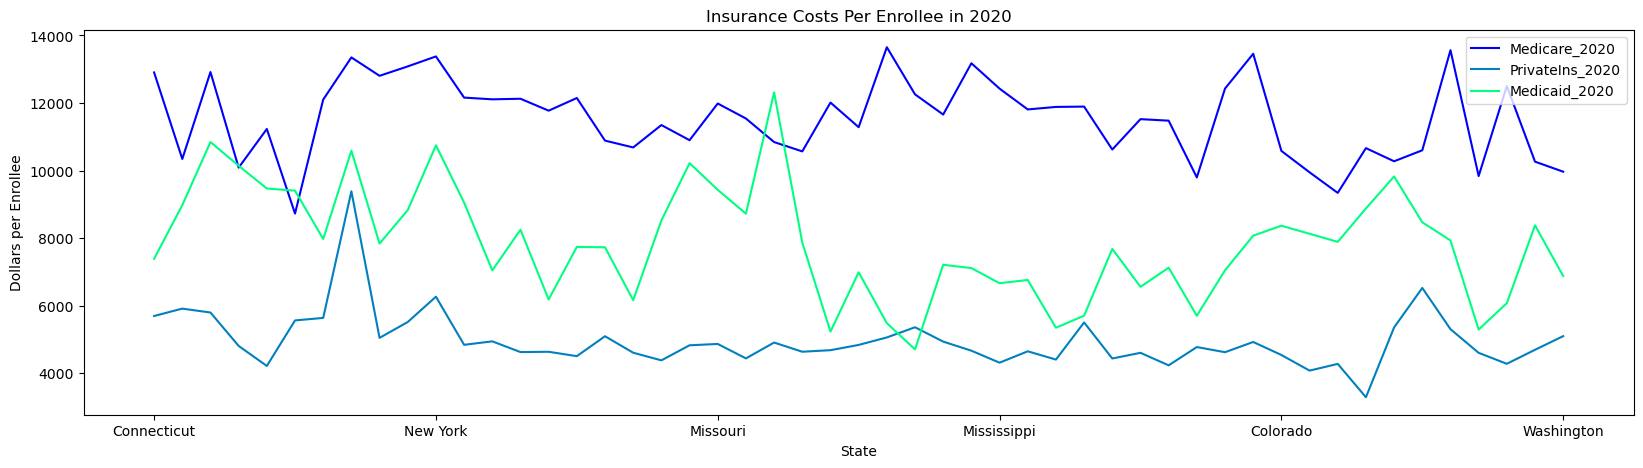

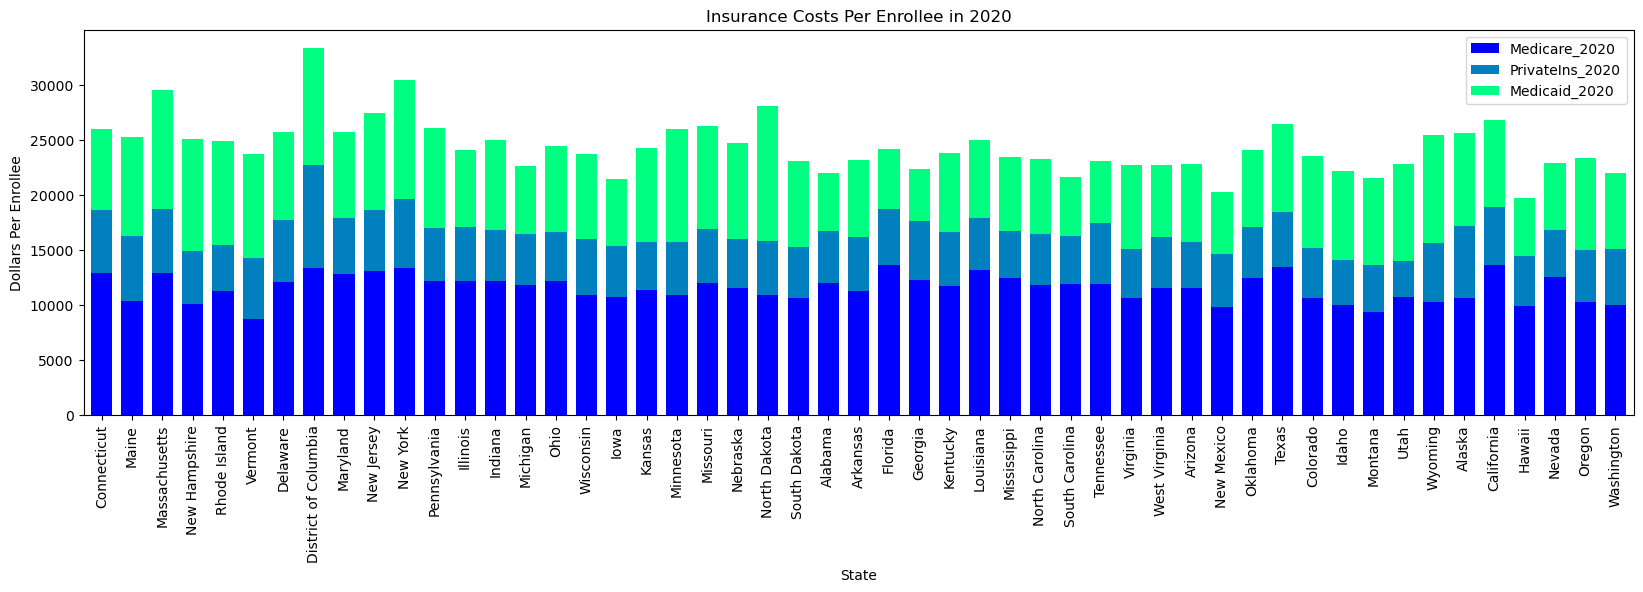

In [53]:
columnNamechg.plot(x="region/state of residence", y=["Medicare_2020", "PrivateIns_2020", "Medicaid_2020"],
                xlabel="State",
                ylabel="Dollars per Enrollee", 
                title="Insurance Costs Per Enrollee in 2020",
                figsize=(20,5), colormap="winter")

columnNamechg.plot(x="region/state of residence", y=["Medicare_2020", "PrivateIns_2020", "Medicaid_2020"],
                xlabel="State",
                ylabel="Dollars Per Enrollee", kind="bar", stacked=True, 
                title="Insurance Costs Per Enrollee in 2020",
                width = .7, figsize=(20,5),colormap='winter')

plt.show

   region/state of residence  Nursing_2020  HomeHealth_2020
0              United States           597              375
1                New England           869              543
2                Connecticut          1015              342
3                      Maine           655              351
4              Massachusetts           829              751
5              New Hampshire           800              397
6               Rhode Island          1051              372
7                    Vermont           791              411
8                    Mideast           853              557
9                   Delaware           790              365
10      District of Columbia           698              531
11                  Maryland           718              272
12                New Jersey           770              330
13                  New York           875              849
14              Pennsylvania           954              426
15               Great Lakes           6

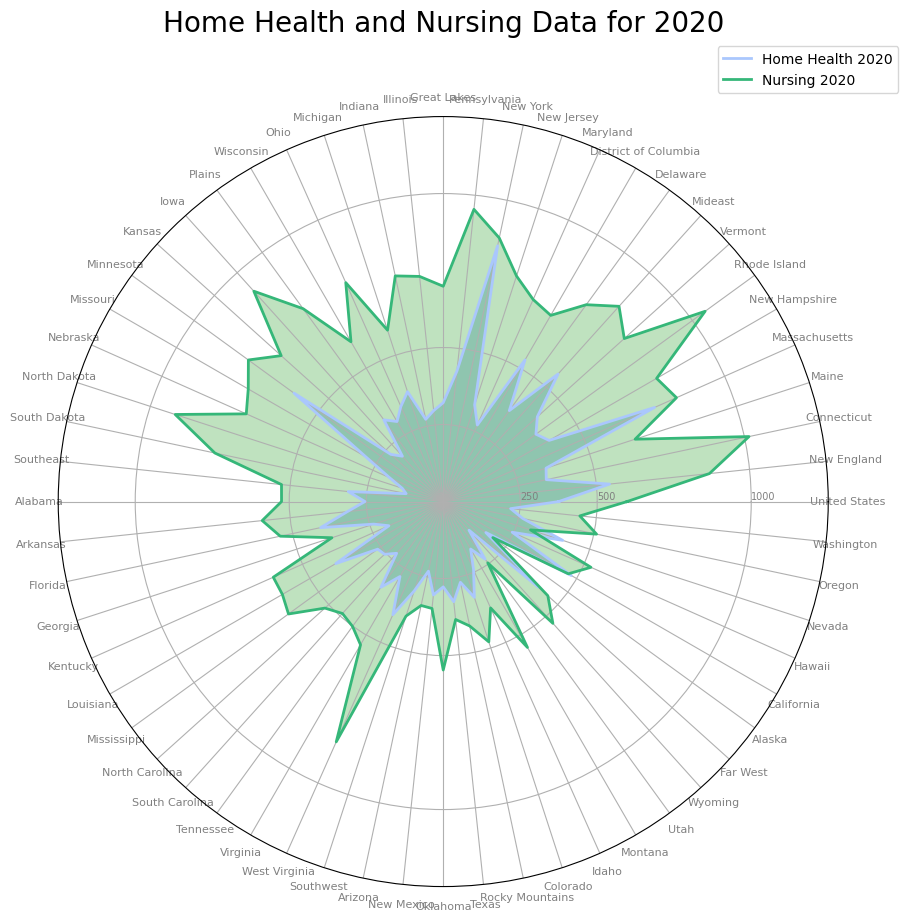

In [87]:
user = 'postgres' # Your username (try entering pgadmin to find)
password = 'Enter123' # Your Password
host = 'localhost'
port = '5432'
database_name = 'Healthcare_DB'

connection = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database_name}'
engine = create_engine(connection)
with engine.connect() as connection:
    query = text('SELECT * FROM "2020_Combined";')
    data = pd.read_sql(query, connection)
    print(data)
connection.close()

# Display the DataFrame
print(df.head())

from math import pi
import seaborn as sns

# Prepare data for radar chart (example for 2020)
categories = data['region/state of residence']
n_categories = len(categories)

home_health_2020 = data['HomeHealth_2020'].values
nursing_2020 = data['Nursing_2020'].values

# Add the first value to the end to close the circle
home_health_2020 = np.append(home_health_2020, home_health_2020[0])
nursing_2020 = np.append(nursing_2020, nursing_2020[0])

# Compute angle for each category
angles = [n / float(n_categories) * 2 * pi for n in range(n_categories)]
angles += angles[:1]

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axe per category and add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([250, 500, 1000], ["250", "500", "1000"], color="grey", size=7)
plt.ylim(0, 1250)

# Plot data
ax.plot(angles, home_health_2020, linewidth=2, linestyle='solid', label='Home Health 2020', color=sns.color_palette('coolwarm', 2)[0])
ax.fill(angles, home_health_2020, sns.color_palette('coolwarm', 2)[0], alpha=0.3)

ax.plot(angles, nursing_2020, linewidth=2, linestyle='solid', label='Nursing 2020', color=sns.color_palette('viridis', 2)[1])
ax.fill(angles, nursing_2020, sns.color_palette('viridis', 2)[1], alpha=0.3)

# Add a title
plt.title('Home Health and Nursing Data for 2020', size=20, color='black', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()